In [5]:
import pandas as pd
from matplotlib import pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [6]:
df = pd.read_csv("./datas/Netflix TV Shows and Movies.csv")

In [7]:
df.head(2)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0


In [8]:
df.shape

(5283, 11)

In [9]:
#TYPE에는 어떤 종류가 있을까?
df['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [11]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [12]:
# 필요 없는 열 drop
df = df.drop(['imdb_id'], axis=1)

In [13]:
df.head(4)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0


In [14]:
df.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [15]:
# 나이제한 고유값 확인
age_unique = df['age_certification'].unique()
age_unique

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [16]:
type_count = df['type'].value_counts()

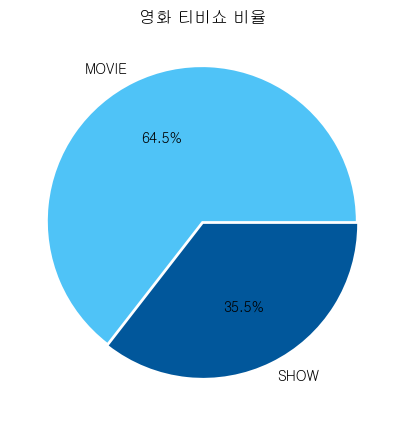

In [17]:
# 영화와 무비의 비율

plt.figure(figsize=(8, 5))
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', 
        explode=[0.01, 0.01], colors=['#4FC3F7', '#01579B'])
plt.title("영화 티비쇼 비율")
plt.show()

In [36]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [40]:
df['release_year'].isnull().sum()

np.int64(0)

In [45]:
df['release_year'].unique()

array([1976, 1975, 1979, 1973, 1969, 1971, 1964, 1980, 1967, 1966, 1961,
       1954, 1958, 1968, 1977, 1972, 1963, 1960, 1956, 1953, 1974, 1959,
       1962, 1978, 1986, 1989, 1984, 1990, 1987, 1983, 1982, 1981, 1988,
       1985, 1995, 2000, 1997, 1994, 1996, 1999, 1998, 1993, 1992, 1991,
       2008, 2010, 2004, 2005, 2003, 2009, 2007, 2006, 2001, 2002, 2012,
       2011, 2014, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2021])

Text(0, 0.5, 'num of contents')

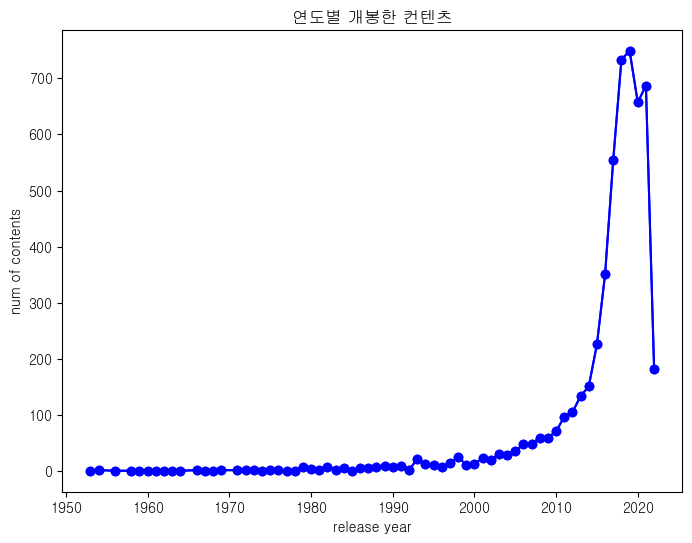

In [44]:
release_year_contents = df.groupby('release_year').size()
plt.figure(figsize=(8, 6))
# 연도별 개봉한 무비 티비쇼 차트
plt.plot(release_year_contents.index, release_year_contents.values, release_year_contents,
         marker='o', color='blue')
plt.title("연도별 개봉한 컨텐츠")
plt.xlabel("release year")
plt.ylabel("num of contents")